In [1]:
# Reta Giblin
# DSBA-6010 Project 1
# 
# Fall 2023
# Data Preprocessing & Supervised Learning Models

In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, precision_score, roc_auc_score, mean_squared_error, roc_curve, auc
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import GradientBoostingClassifier
print("all good!")

all good!


In [3]:
# Read dataset

In [4]:
#dtype_dict = {'dialysisrenalendstage': bool, 'asthma': bool, 'irondef': bool, 'pneum': bool, 'substancedependence': bool, 
#              'psychologicaldisordermajor': bool, 'depress': bool,  'psychother': bool,  'fibrosisandother': bool, 
#              'malnutrition': bool, 'hemo': bool,}
dtype_dict = {'dialysisrenalendstage': int, 'asthma': int, 'irondef': int, 'pneum': int, 'substancedependence': int, 
              'psychologicaldisordermajor': int, 'depress': int,  'psychother': int,  'fibrosisandother': int, 
              'malnutrition': int, 'hemo': int,}

# set up to read date fields as dates
date_columns = ['vdate', 'discharged']
los_data = pd.read_csv("LengthOfStay.csv", dtype = dtype_dict, parse_dates=date_columns)

In [5]:
# DATA PREPROCESSING/TRANSFORMATION
los_data.dtypes

eid                                    int64
vdate                         datetime64[ns]
rcount                                object
gender                                object
dialysisrenalendstage                  int32
asthma                                 int32
irondef                                int32
pneum                                  int32
substancedependence                    int32
psychologicaldisordermajor             int32
depress                                int32
psychother                             int32
fibrosisandother                       int32
malnutrition                           int32
hemo                                   int32
hematocrit                           float64
neutrophils                          float64
sodium                               float64
glucose                              float64
bloodureanitro                       float64
creatinine                           float64
bmi                                  float64
pulse     

In [6]:
# Create a boolean column based on the 'gender' column
los_data['is_female'] = los_data['gender'] == 'F'

# Convert the boolean column to boolean data type
#los_data['is_female'] = los_data['is_female'].astype(bool)
los_data['is_female'] = los_data['is_female'].astype(int)

# Transform lengthofstay to binary field
# Create a Boolean field name longlengthstay
# If lengthofstay Less that 7 days set longlengthofstay to 0 if >= 7 days set longlengthofstay to 1

los_data['longlengthofstay'] = los_data['lengthofstay'] >= 7

In [7]:
# DATA ENCODING

In [8]:
# Create dummy variables for the facid column

los_data = pd.get_dummies(los_data, columns=['facid'], prefix='facid')

In [9]:
# Change rcount categorical value to an integer
# Replace '5+' with '5' in the facid column
los_data['rcount'] = los_data['rcount'].astype(str) 
los_data['rcount'] = los_data['rcount'].str.replace('5\+', '5')

# Change type of facid to integer
los_data['rcount'] = los_data['rcount'].astype(int)

C:\Users\topsn\AppData\Local\Temp\ipykernel_6124\305149236.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  los_data['rcount'] = los_data['rcount'].str.replace('5\+', '5')


In [10]:
# Drop unneeded columns
column_to_drop = ['gender', 'lengthofstay','eid']
los_data = los_data.drop(column_to_drop, axis=1)

In [11]:
# REMOVING OUTLIERS

In [12]:
# Define a function to remove outliers based on Z-score
def remove_outliers(df, columns, threshold=3):
    z_scores = np.abs((df[columns] - df[columns].mean()) / df[columns].std())
    df_no_outliers = df[(z_scores < threshold).all(axis=1)]
    return df_no_outliers

In [13]:
# Remove outliers for numerical data
numeric_columns = ['hematocrit', 'neutrophils', 'sodium', 'glucose', 'bloodureanitro', 'creatinine', 'bmi', 'pulse','respiration']

# Remove rows with outliers (Z-score threshold = 3)
los_data = remove_outliers(los_data, numeric_columns)

In [14]:
# Feature Engineer vdate date

# Extract vdate individual elements
los_data['vdate_year'] = los_data['vdate'].dt.year
los_data['vdate_month'] = los_data['vdate'].dt.month
los_data['vdate_day'] = los_data['vdate'].dt.day
los_data['vdate_day_of_week'] = los_data['vdate'].dt.dayofweek

# Convert vdate elements to integers
los_data['vdate_year'] = los_data['vdate_year'].astype(float)
los_data['vdate_month'] = los_data['vdate_month'].astype(float)
los_data['vdate_day'] = los_data['vdate_day'].astype(float)
los_data['vdate_day_of_week'] = los_data['vdate_day_of_week'].astype(float)

In [15]:
# Feature Engineer discharged date

# Extract vdate individual elements
los_data['discharged_year'] = los_data['discharged'].dt.year
los_data['discharged_month'] = los_data['discharged'].dt.month
los_data['discharged_day'] = los_data['discharged'].dt.day
los_data['discharged_day_of_week'] = los_data['discharged'].dt.dayofweek

# Convert vdate elements to integers
los_data['discharged_year'] = los_data['discharged_year'].astype(float)
los_data['discharged_month'] = los_data['discharged_month'].astype(float)
los_data['discharged_day'] = los_data['discharged_day'].astype(float)
los_data['discharged_day_of_week'] = los_data['discharged_day_of_week'].astype(float)

In [16]:
# Drop original vdate and discharge fields
column_to_drop = ['vdate', 'discharged']
los_data = los_data.drop(column_to_drop, axis=1)

In [17]:
# Create heatmap of multicollinearity

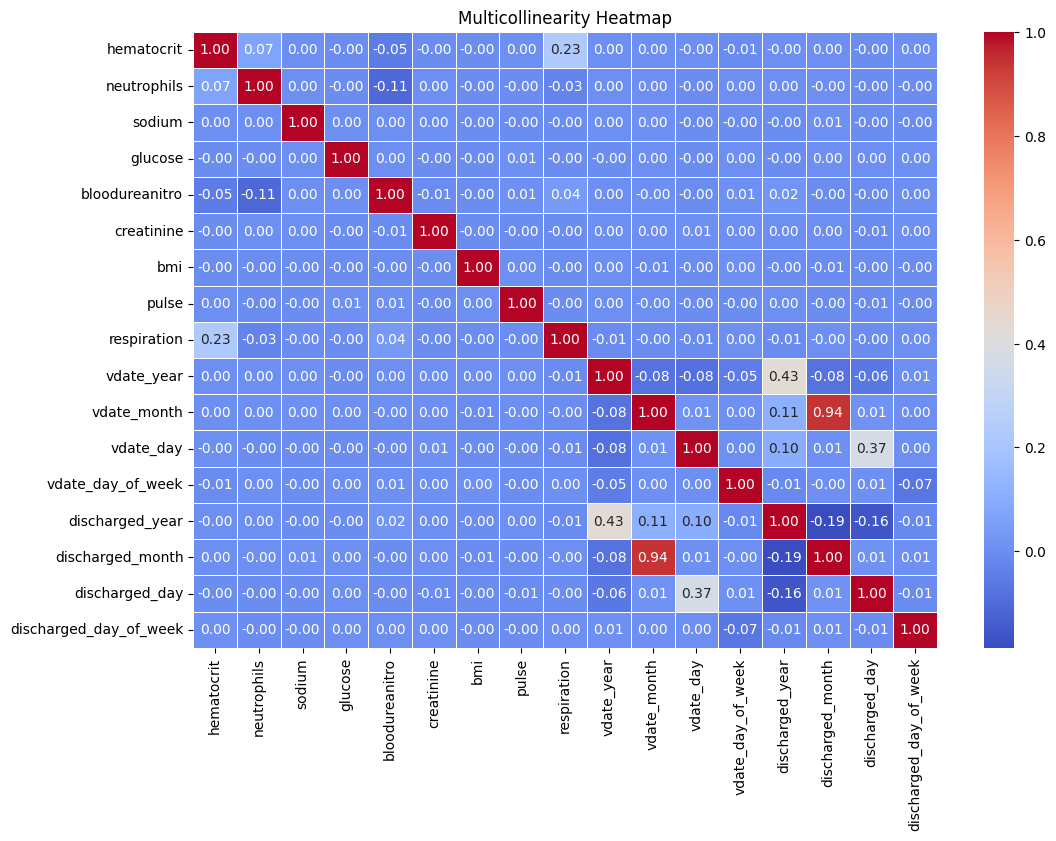

In [18]:
corr_matrix = los_data[['hematocrit', 'neutrophils', 'sodium', 'glucose', 'bloodureanitro', 'creatinine', 'bmi', 'pulse','respiration',
                       'vdate_year', 'vdate_month', 'vdate_day', 'vdate_day_of_week', 
                        'discharged_year', 'discharged_month', 'discharged_day', 'discharged_day_of_week' ]].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Multicollinearity Heatmap')
plt.show()

In [19]:
# vdate and discharge date are too correlated
# will not include vdate in model
# Drop unneeded vdate

column_to_drop = ['vdate_year', 'vdate_month', 'vdate_day', 'vdate_day_of_week']
los_data = los_data.drop(column_to_drop, axis=1)

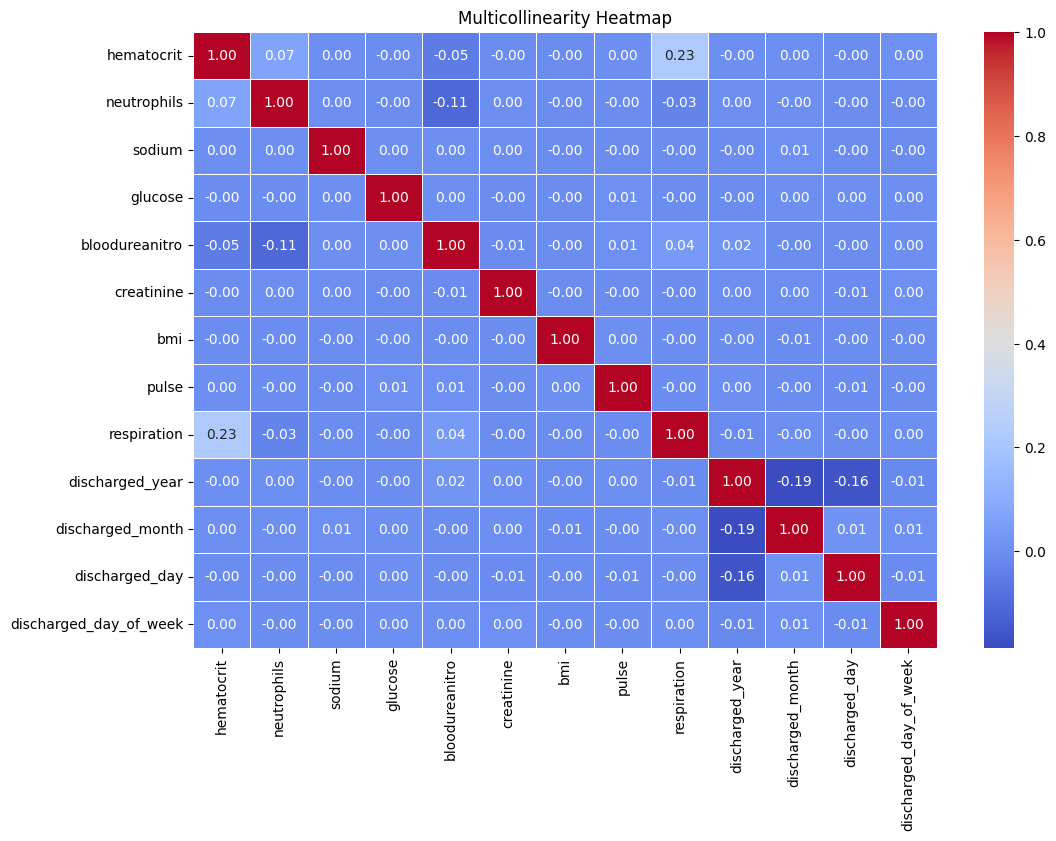

In [20]:
# Rerun correlation matrix
corr_matrix = los_data[['hematocrit', 'neutrophils', 'sodium', 'glucose', 'bloodureanitro', 'creatinine', 'bmi', 'pulse','respiration', 
                        'discharged_year', 'discharged_month', 'discharged_day', 'discharged_day_of_week']].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Multicollinearity Heatmap')
plt.show()

In [21]:
los_data['longlengthofstay']=los_data['longlengthofstay'].astype('int')
los_data['facid_A']=los_data['facid_A'].astype('int')
los_data['facid_B']=los_data['facid_B'].astype('int')
los_data['facid_C']=los_data['facid_C'].astype('int')
los_data['facid_D']=los_data['facid_D'].astype('int')
los_data['facid_E']=los_data['facid_E'].astype('int')

los_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93801 entries, 0 to 99999
Data columns (total 33 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   rcount                      93801 non-null  int32  
 1   dialysisrenalendstage       93801 non-null  int32  
 2   asthma                      93801 non-null  int32  
 3   irondef                     93801 non-null  int32  
 4   pneum                       93801 non-null  int32  
 5   substancedependence         93801 non-null  int32  
 6   psychologicaldisordermajor  93801 non-null  int32  
 7   depress                     93801 non-null  int32  
 8   psychother                  93801 non-null  int32  
 9   fibrosisandother            93801 non-null  int32  
 10  malnutrition                93801 non-null  int32  
 11  hemo                        93801 non-null  int32  
 12  hematocrit                  93801 non-null  float64
 13  neutrophils                 938

In [22]:
## Ended up dropping discharged date too as was giving errors in model
column_to_drop = ['discharged_year', 'discharged_month', 'discharged_day', 'discharged_day_of_week']
los_data = los_data.drop(column_to_drop, axis=1)

In [23]:
# Scale numerical data

In [24]:
scaler = MinMaxScaler()

# Assuming 'data' is your DataFrame with the 9 variables you want to scale
columns_to_scale = ['hematocrit', 'neutrophils', 'sodium', 'glucose', 'bloodureanitro', 'creatinine', 
                    'bmi', 'pulse', 'respiration']

# Fit the scaler on your data and transform the selected columns
los_data[columns_to_scale] = scaler.fit_transform(los_data[columns_to_scale])

In [25]:
# Split data into training and test

In [26]:
# Split the dataset into features (X) and the target variable (y)
X = los_data.drop('longlengthofstay', axis=1) 
y = los_data['longlengthofstay']

# Split the data into a training set and a testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Split training data into training set and validation set
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)

In [27]:
## RUN SUPERVISED LEARNING MODELS

In [28]:
# Logistic Regression

In [29]:
# Create a logistic regression model
logistic_regression = LogisticRegression(max_iter=5000)

# Fit the model to the training data
logistic_regression.fit(X_train, y_train)

# Make predictions on the test set
y_pred_LR = logistic_regression.predict(X_test)


In [30]:

# Probability of long stay
y_proba_LR = logistic_regression.predict_proba(X_test)[:, 1]

In [31]:
# Calculate model statistics

# Calculate accuracy and other metrics
accuracy = accuracy_score(y_test, y_pred_LR)
report = classification_report(y_test, y_pred_LR)
conf_matrix = confusion_matrix(y_test, y_pred_LR)

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred_LR)
recall = recall_score(y_test, y_pred_LR)
f1 = f1_score(y_test, y_pred_LR)

# Calculate AUC (Area Under the ROC Curve)
auc_LR = roc_auc_score(y_test, y_proba_LR)

# Get coefficients and feature names
coefficients = logistic_regression.coef_
feature_names = X_train.columns

In [32]:
# Print the model statististics - Logistic Regression

In [33]:
print(f'Accuracy: {accuracy}')
print('\nClassification Report:\n', report)
print('Confusion Matrix:\n', conf_matrix)
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")
print(f"AUC: {auc_LR:.2f}")

# Print the model's coefficients and intercept
print("Features:", feature_names)
print("Coefficients:", logistic_regression.coef_)
print("Intercept:", logistic_regression.intercept_)


Accuracy: 0.9259634347849262

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.96      0.96     15938
           1       0.76      0.74      0.75      2823

    accuracy                           0.93     18761
   macro avg       0.86      0.85      0.85     18761
weighted avg       0.93      0.93      0.93     18761

Confusion Matrix:
 [[15285   653]
 [  736  2087]]
Precision: 0.76
Recall: 0.74
F1-score: 0.75
AUC: 0.96
Features: Index(['rcount', 'dialysisrenalendstage', 'asthma', 'irondef', 'pneum',
       'substancedependence', 'psychologicaldisordermajor', 'depress',
       'psychother', 'fibrosisandother', 'malnutrition', 'hemo', 'hematocrit',
       'neutrophils', 'sodium', 'glucose', 'bloodureanitro', 'creatinine',
       'bmi', 'pulse', 'respiration', 'secondarydiagnosisnonicd9', 'is_female',
       'facid_A', 'facid_B', 'facid_C', 'facid_D', 'facid_E'],
      dtype='object')
Coefficients: [[ 1.63229429  0.75265765  0.

In [34]:
# Logistic Regression Model Validation:


In [35]:
# Make predictions on the validation set
y_pred_LR = logistic_regression.predict(X_val)

# Probability of long stay
y_proba_LR = logistic_regression.predict_proba(X_val)[:, 1]

In [36]:
# Calculate Model statistics for Validation for Logistic Regression

In [37]:
# Calculate accuracy and other metrics
accuracy = accuracy_score(y_val, y_pred_LR)
report = classification_report(y_val, y_pred_LR)
conf_matrix = confusion_matrix(y_val, y_pred_LR)

# Calculate precision, recall, and F1-score
precision = precision_score(y_val, y_pred_LR)
recall = recall_score(y_val, y_pred_LR)
f1 = f1_score(y_val, y_pred_LR)

# Calculate AUC (Area Under the ROC Curve)
auc_LR = roc_auc_score(y_val, y_proba_LR)

In [38]:
# Print the model statististics - Logistic Regression

In [39]:
print(f'Accuracy: {accuracy}')
print('\nClassification Report:\n', report)
print('Confusion Matrix:\n', conf_matrix)
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")
print(f"AUC: {auc_LR:.2f}")

# Print the model's coefficients and intercept
print("Features:", feature_names)
print("Coefficients:", logistic_regression.coef_)
print("Intercept:", logistic_regression.intercept_)

Accuracy: 0.9272388059701493

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.96      0.96     12707
           1       0.77      0.75      0.76      2301

    accuracy                           0.93     15008
   macro avg       0.86      0.85      0.86     15008
weighted avg       0.93      0.93      0.93     15008

Confusion Matrix:
 [[12195   512]
 [  580  1721]]
Precision: 0.77
Recall: 0.75
F1-score: 0.76
AUC: 0.96
Features: Index(['rcount', 'dialysisrenalendstage', 'asthma', 'irondef', 'pneum',
       'substancedependence', 'psychologicaldisordermajor', 'depress',
       'psychother', 'fibrosisandother', 'malnutrition', 'hemo', 'hematocrit',
       'neutrophils', 'sodium', 'glucose', 'bloodureanitro', 'creatinine',
       'bmi', 'pulse', 'respiration', 'secondarydiagnosisnonicd9', 'is_female',
       'facid_A', 'facid_B', 'facid_C', 'facid_D', 'facid_E'],
      dtype='object')
Coefficients: [[ 1.63229429  0.75265765  0.

In [40]:
# Gradiant Boosting Classifier Model

In [41]:
# Create a Gradient Boosting Classifier
gradient_boosting_classifier = GradientBoostingClassifier(n_estimators=500, learning_rate=0.2, max_depth=3, min_samples_leaf=2, min_samples_split=10)

# Fit the model to the training data
gradient_boosting_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred_GB = gradient_boosting_classifier.predict(X_test)

# Probability of long stay
y_proba_GB = gradient_boosting_classifier.predict_proba(X_test)[:, 1]

In [42]:
# Calculate model statistics

# Calculate accuracy and other metrics
accuracy = accuracy_score(y_test, y_pred_GB)
report = classification_report(y_test, y_pred_GB)
conf_matrix = confusion_matrix(y_test, y_pred_GB)

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred_GB)
recall = recall_score(y_test, y_pred_GB)
f1 = f1_score(y_test, y_pred_GB)

# Calculate AUC (Area Under the ROC Curve)
auc_GB = roc_auc_score(y_test, y_proba_GB)

In [43]:
print(f'Accuracy: {accuracy}')
print('\nClassification Report:\n', report)
print('Confusion Matrix:\n', conf_matrix)
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")
print(f"AUC: {auc_GB:.2f}")
#print("Feature Importance:", feature_importance)

# Print the model's coefficients and intercept
print("Features:", feature_names)

Accuracy: 0.9779862480678002

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99     15938
           1       0.92      0.93      0.93      2823

    accuracy                           0.98     18761
   macro avg       0.96      0.96      0.96     18761
weighted avg       0.98      0.98      0.98     18761

Confusion Matrix:
 [[15725   213]
 [  200  2623]]
Precision: 0.92
Recall: 0.93
F1-score: 0.93
AUC: 1.00
Features: Index(['rcount', 'dialysisrenalendstage', 'asthma', 'irondef', 'pneum',
       'substancedependence', 'psychologicaldisordermajor', 'depress',
       'psychother', 'fibrosisandother', 'malnutrition', 'hemo', 'hematocrit',
       'neutrophils', 'sodium', 'glucose', 'bloodureanitro', 'creatinine',
       'bmi', 'pulse', 'respiration', 'secondarydiagnosisnonicd9', 'is_female',
       'facid_A', 'facid_B', 'facid_C', 'facid_D', 'facid_E'],
      dtype='object')


In [44]:
# Gradiant Boosting Classifier Model Validation

In [45]:
# Make predictions on the test data
y_pred = gradient_boosting_classifier.predict(X_val)

# Probability of long stay
y_proba = gradient_boosting_classifier.predict_proba(X_val)[:, 1]

In [46]:
# Calculate model statistics

# Calculate accuracy and other metrics
accuracy = accuracy_score(y_val, y_pred)
report = classification_report(y_val, y_pred)
conf_matrix = confusion_matrix(y_val, y_pred)

# Calculate precision, recall, and F1-score
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)

# Calculate AUC (Area Under the ROC Curve)
auc_GBV = roc_auc_score(y_val, y_proba)

In [47]:
print(f'Accuracy: {accuracy}')
print('\nClassification Report:\n', report)
print('Confusion Matrix:\n', conf_matrix)
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")
print(f"AUC_GBV: {auc_GB:.2f}")
#print("Feature Importance:", feature_importance)

Accuracy: 0.9790111940298507

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99     12707
           1       0.93      0.93      0.93      2301

    accuracy                           0.98     15008
   macro avg       0.96      0.96      0.96     15008
weighted avg       0.98      0.98      0.98     15008

Confusion Matrix:
 [[12549   158]
 [  157  2144]]
Precision: 0.93
Recall: 0.93
F1-score: 0.93
AUC_GBV: 1.00


In [48]:
### XAI
import shap
from interpret import show
from interpret.blackbox import ShapKernel
from interpret.blackbox import LimeTabular
from interpret.blackbox import PartialDependence
#gradient_boosting_classifier.predict_proba([X_test.iloc[0]])


IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


In [49]:
#pd.crosstab(X_train['rcount'],y_train)
#pd.crosstab(X_val['rcount'], y_val)
X_train['rcount'].value_counts()

0    33069
1     9089
2     5969
3     4834
4     4092
5     2979
Name: rcount, dtype: int64

In [50]:

gb_shap = ShapKernel(gradient_boosting_classifier, shap.sample(X_train, 100))
gb_shap_local = gb_shap.explain_local(X_test[:100], y_test[:100])
show(gb_shap_local)

The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.


100%|██████████| 100/100 [03:08<00:00,  1.88s/it]


<!-- http://127.0.0.1:7001/1826337556624/ -->

In [51]:

gb_lime = LimeTabular(gradient_boosting_classifier, X_train)
gb_lime_local = gb_lime.explain_local(X_test[:99], y_test[:99])
show(gb_lime_local)


C:\Users\topsn\AppData\Local\Temp\ipykernel_6124\2592683282.py:2: FutureWarning:

The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.



<!-- http://127.0.0.1:7001/1826513644816/ -->

In [52]:
gb_pdp = PartialDependence(gradient_boosting_classifier, X_train)
gb_pdp_global = gb_pdp.explain_global()
show(gb_pdp_global)

<!-- http://127.0.0.1:7001/1826542397968/ -->

c:\Users\topsn\AppData\Local\Programs\Python\Python311\Lib\site-packages\shap\plots\_beeswarm.py:699: UserWarning:

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored



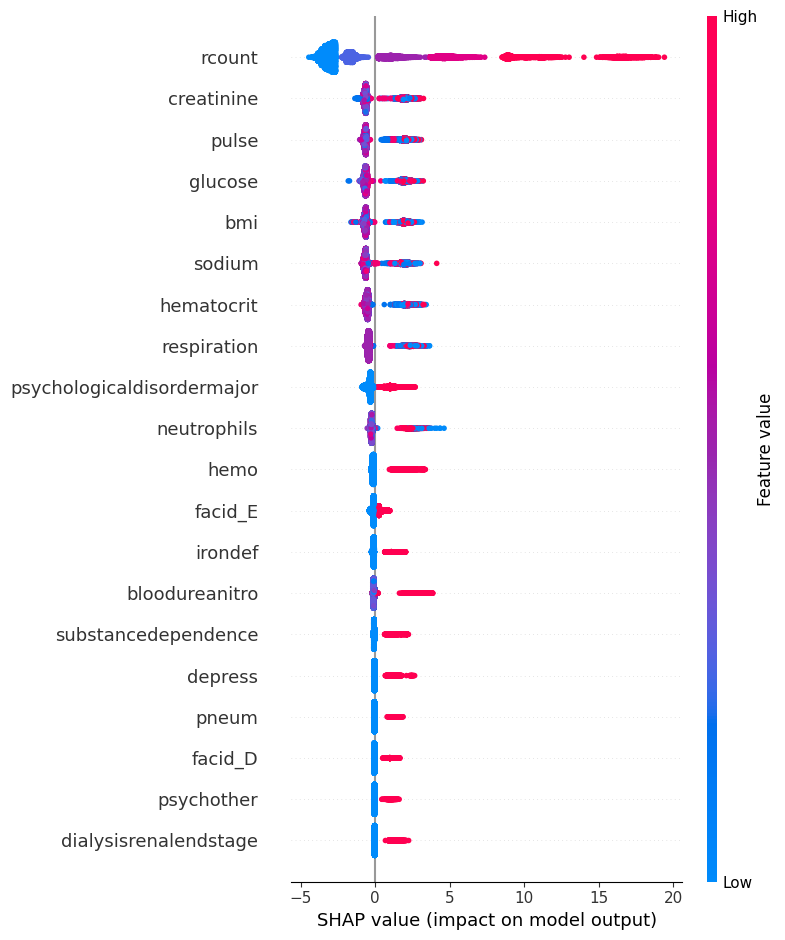

In [53]:
explainer = shap.TreeExplainer(gradient_boosting_classifier)
# Calculate shapley values for test data
shap_values = explainer.shap_values(X_test)

# %% Investigating the values (classification problem)
# class 0 = contribution to class 1
# class 1 = contribution to class 2
#print(shap_values[0].shape)
#shap_values

shap.initjs()
# Force plot
#shap.force_plot(explainer.expected_value[1],
#                shap_values[1],
#                X_test[1:2]) # for values

# Feature summary
shap.summary_plot(shap_values, X_test)

## Logistic regression Model validation

In [54]:
lg_shap = ShapKernel(logistic_regression, shap.sample(X_train, 100))
lg_shap_local = lg_shap.explain_local(X_test[:100], y_test[:100])
show(lg_shap_local)

C:\Users\topsn\AppData\Local\Temp\ipykernel_6124\3003894197.py:2: FutureWarning:

The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.

100%|██████████| 100/100 [01:14<00:00,  1.35it/s]


<!-- http://127.0.0.1:7001/1826584869072/ -->

In [55]:

lg_lime = LimeTabular(logistic_regression, X_train)
lg_lime_local = lg_lime.explain_local(X_test[:99], y_test[:99])
show(lg_lime_local)

C:\Users\topsn\AppData\Local\Temp\ipykernel_6124\2138520568.py:2: FutureWarning:

The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.



<!-- http://127.0.0.1:7001/1826542270672/ -->

c:\Users\topsn\AppData\Local\Programs\Python\Python311\Lib\site-packages\shap\plots\_beeswarm.py:699: UserWarning:

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored



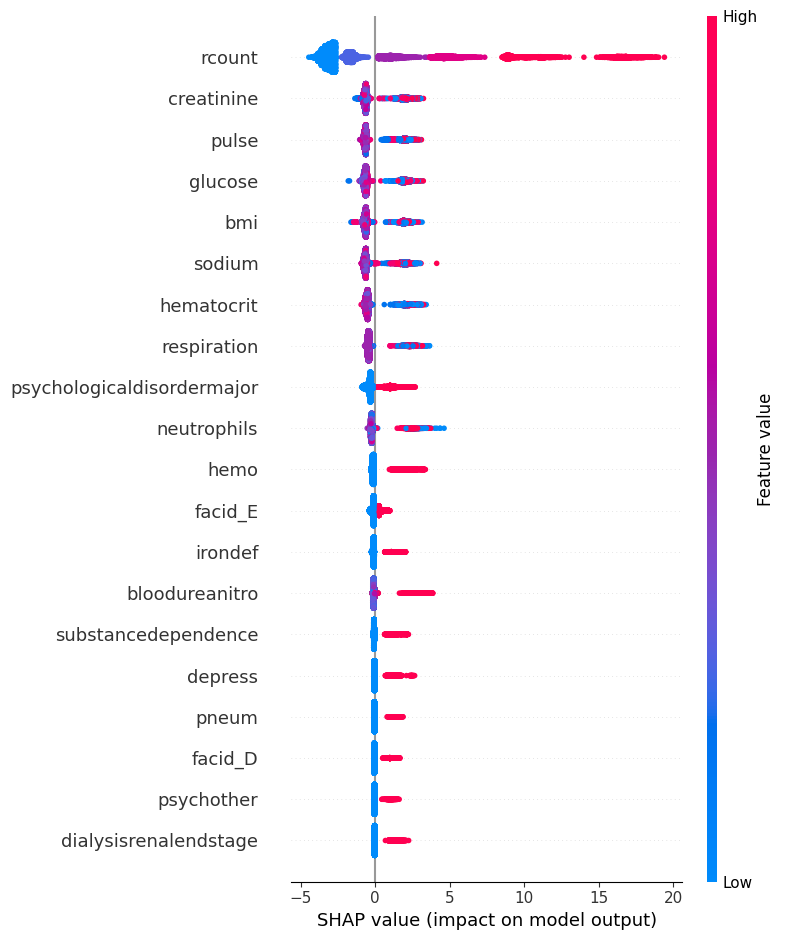

In [59]:
explainer = shap.Explainer(logistic_regression,X_test)
# Calculate shapley values for test data
# shap_values = explainer.shap_values(X_test)

# %% Investigating the values (classification problem)
# class 0 = contribution to class 1
# class 1 = contribution to class 2
#print(shap_values[0].shape)
#shap_values

shap.initjs()
# Force plot
#shap.force_plot(explainer.expected_value[1],
#                shap_values[1],
#                X_test[1:2]) # for values

# Feature summary
shap.summary_plot(shap_values, X_test)